# Coursera Capstone Project Using Seattle Collision Data

### This is a Jupyter notebook we will be using to analyze and present findings based on collision data in the city of Seattle

# Introduction and Business Understanding

## Overview

There are more than 10,000 traffic collisions per year involving cars, bicyclists and pedestrians. Understanding the causes of collisions as well as the conditions that impact their severity will help provide insight to officials on how to better allocate resources to help reduce the number and severity of such incidents.

Further, a better understanding of the factors that increase the likelihood of collisions and increase the probability of injury or property damage can help with education efforts to help individuals take greater precautions when making travel decisions.

## Goals of the Project

The goal of the project is to use publicly available data compiled by the Seattle Deport of Transportation (SDOT), to identify feautures in the dataset that yield predictive information on the number and severity of collisions and injuries in Seattle.

We will also look to use data visualization tools to communicate this information and provide an overview of the current state of traffic collisions in Seattle.

# Data Understanding

The dataset we are using is *Collisions - All Years* dataset maintained by the SDOT Traffic Management Division's Traffic Records Group.  This dataset includes all types of collisions, including car, bicycle, and pedestrian as provided by the Seattle Police Department in their Traffic Records.

The data set contains information on over 194,000 collisions in Seattle over a 15-year period.  The primary attribute we are looking to predict is the severity of the collision as captured by the Severity Code assigned to the collision.  Interestingly, the dataset description provided by SDOT indicates this Severity Code attribute should take values between 0 and 3 (including both 2 and 2b to differential "injury" from "serious injury"); however, the actual data set only contains the values 1 and 2 for this attribute.  One avenue to explore in a future project is to find additional information on this target attribute.

The data includes 37 different features including: day, time, month, lighting conditions, road conditions and weather conditions.

A full description of the data can be found at: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf

In [1]:
import pandas as pd
import numpy as np
import folium

In [2]:
path="~/Documents/CertificationStuff/IBMPythonDataScience/Data_Science_Capstone/Data-Collisions.csv"

df = pd.read_csv(path, low_memory=False)

In [3]:
# Drop rows without latitude and longitude
df.dropna(subset=["X"],axis=0,inplace=True)

# Replace the rows that are missing Coordinates with the average coordinate 
#mean_longtitude = df["X"].mean()
#mean_latitude = df["Y"].mean()
#df["X"].replace(np.nan, mean_longitude, inplace = True)
#df["Y"].replace(np.nan, mean_latitutde, inplace = True)

# Drop Unnecessary or Redundant Columns
df.drop(['SEVERITYCODE.1','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','ADDRTYPE','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SDOT_COLCODE','SDOT_COLDESC','PEDROWNOTGRNT','SDOTCOLNUM','ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY'],axis = 1, inplace = True)

df['SEVERITYCODE'] = df['SEVERITYCODE'] - 1

# Replace string values with Boolean values in some appropriate Columns
df['INATTENTIONIND'].replace(np.nan, 0, inplace = True)
df['INATTENTIONIND'].replace(to_replace='Y', value = 1, inplace = True)

df['UNDERINFL'].replace(np.nan, 0, inplace = True)
df['UNDERINFL'].replace('N', 0, inplace = True)
df['UNDERINFL'].replace('*',0, inplace= True)
df['UNDERINFL'].replace('Y',1,inplace = True)
df['UNDERINFL'] = df['UNDERINFL'].astype(int)

df['COLLISIONTYPE'].replace(np.nan, "Other", inplace = True)

df['SPEEDING'].replace(np.nan, False, inplace = True)
df['SPEEDING'].replace('Y', True, inplace = True)
df['SPEEDING'] = df['SPEEDING'].astype(int)

df['HITPARKEDCAR'].replace('N', False, inplace = True)
df['HITPARKEDCAR'].replace('Y', True, inplace = True)
df['HITPARKEDCAR'] = df['HITPARKEDCAR'].astype(int)

# Consolidate missing, "Unknown", NaN values in some columns to "Unknown"
df['WEATHER'].replace(np.nan,"Unknown", inplace = True)
df['WEATHER'].replace("Other", "Unknown", inplace = True)

df['ROADCOND'].replace(np.nan, "Unknown", inplace = True)
df['ROADCOND'].replace("Other", "Unknown", inplace = True)

df['LIGHTCOND'].replace(np.nan, "Unknown", inplace = True)
df['LIGHTCOND'].replace("Other", "Unknown", inplace = True)

In [4]:
df.head()

,SEVERITYCODE,X,Y,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,1,-122.323148,47.703140,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/13 14:54,At Intersection (intersection related),0,0,Overcast,Wet,Daylight,0,0
1,0,-122.347294,47.647172,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/06 18:55,Mid-Block (not related to intersection),0,0,Raining,Wet,Dark - Street Lights On,0,0
2,0,-122.334540,47.607871,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/04 10:20,Mid-Block (not related to intersection),0,0,Overcast,Dry,Daylight,0,0
3,0,-122.334803,47.604803,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/13 9:26,Mid-Block (not related to intersection),0,0,Clear,Dry,Daylight,0,0
4,1,-122.306426,47.545739,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/04 8:04,At Intersection (intersection related),0,0,Raining,Wet,Daylight,0,0


In [5]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
INATTENTIONIND      int64
UNDERINFL           int64
WEATHER            object
ROADCOND           object
LIGHTCOND          object
SPEEDING            int64
HITPARKEDCAR        int64
dtype: object

In [6]:
df.describe(include="all")

,SEVERITYCODE,X,Y,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
count,189339.000000,189339.000000,189339.000000,189339,189339,189339.000000,189339.000000,189339.000000,189339.000000,189339,189339,185146,189339.000000,189339.000000,189339,189339,189339,189339.000000,189339.000000
unique,NaN,NaN,NaN,2,10,NaN,NaN,NaN,NaN,5985,157960,7,NaN,NaN,10,8,8,NaN,NaN
top,NaN,NaN,NaN,Property Damage Only Collision,Parked Car,NaN,NaN,NaN,NaN,2006/11/02 00:00:00+00,11/2/06,Mid-Block (not related to intersection),NaN,NaN,Clear,Dry,Daylight,NaN,NaN
freq,NaN,NaN,NaN,132221,46381,NaN,NaN,NaN,NaN,88,88,87390,NaN,NaN,108959,122076,113582,NaN,NaN
mean,0.301671,-122.330518,47.619543,NaN,NaN,2.452986,0.037863,0.028996,1.924136,NaN,NaN,NaN,0.154094,0.046900,NaN,NaN,NaN,0.046055,0.036997
std,0.458984,0.029976,0.056157,NaN,NaN,1.349092,0.200053,0.169143,0.629941,NaN,NaN,NaN,0.361040,0.211425,NaN,NaN,NaN,0.209605,0.188755
min,0.000000,-122.419091,47.495573,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000
25%,0.000000,-122.348673,47.575956,NaN,NaN,2.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000
50%,0.000000,-122.330224,47.615369,NaN,NaN,2.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000
75%,1.000000,-122.311937,47.663664,NaN,NaN,3.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000


In [7]:
possible_severities_counts = df['SEVERITYDESC'].value_counts().to_frame()
print(possible_severities_counts)
print()

possible_weather_conditions = df['WEATHER'].value_counts().to_frame()
print(possible_weather_conditions)
print()

possible_road_conditions = df['ROADCOND'].value_counts().to_frame()
print(possible_road_conditions)
print()

possible_lighting_conditions = df['LIGHTCOND'].value_counts().to_frame()
print(possible_lighting_conditions)
print()

speeding = df['SPEEDING'].value_counts().to_frame()
print(speeding)
print()

under_influence = df['UNDERINFL'].value_counts().to_frame()
print(under_influence)
print()

collision_type = df['COLLISIONTYPE'].value_counts().to_frame()
print(collision_type)

# print("Possible Severities: ", df['SEVERITYDESC'].unique()) 
# print("Weather Conditions: ", df['WEATHER'].unique())
# print("Road Conditions: ", df['ROADCOND'].unique())
# print("Lighting Conditions: ", df['LIGHTCOND'].unique())

                                SEVERITYDESC
Property Damage Only Collision        132221
Injury Collision                       57118

                          WEATHER
Clear                      108959
Raining                     32015
Overcast                    27136
Unknown                     19591
Snowing                       894
Fog/Smog/Smoke                553
Sleet/Hail/Freezing Rain      112
Blowing Sand/Dirt              50
Severe Crosswind               24
Partly Cloudy                   5

                ROADCOND
Dry               122076
Wet                46064
Unknown            18814
Ice                 1177
Snow/Slush           989
Standing Water       102
Sand/Mud/Dirt         64
Oil                   53

                          LIGHTCOND
Daylight                     113582
Dark - Street Lights On       47314
Unknown                       17632
Dusk                           5775
Dawn                           2422
Dark - No Street Lights        1451
Dark - Stre

In [8]:
# Put some types of accidents into data frames so we can analyze

df_icy_road = df[df['ROADCOND']=='Ice']
df_wet_road = df[df['ROADCOND']=='Wet']
df_snow_road = df[df['ROADCOND']=='Snow/Slush']

df_speeding = df[df['SPEEDING'] == 1]
df_under_influence = df[df['UNDERINFL'] == 1]

df_dark = df[df['LIGHTCOND'] == 'Dark - Street Lights Off']

In [9]:
# latitude and longitude of center of Seattle
latitude = 47.6062
longitude = -122.3321

# Create map Seattle
seattle_map = folium.Map(location=[latitude,longitude],zoom_start=11)

# Display map of Seattle
seattle_map

In [10]:
# Adding features to the map

dark_collision = folium.map.FeatureGroup()

for lat,lng in zip(df_dark.Y, df_dark.X):
    dark_collision.add_child(
        folium.features.CircleMarker(
            [lat,lng],
            radius = 5,
            color = 'yellow',
            fill = True,
            fill_color = 'blue',
            fill_opacity = 0.6
        )
    )

# snow_collisions = folium.map.FeatureGroup()

# for lat,lng in zip(df_snow_road.Y, df_snow_road.X):
#    snow_collisions.add_child(
#        folium.features.CircleMarker(
#            [lat,lng],
#            radius = 5,
#            color='yellow',
#            fill = True,
#            fill_color='blue',
#            fill_opacity = 0.6
#        )
#    )

seattle_map.add_child(dark_collision)

In [11]:
from folium import plugins

seattle_map = folium.Map(location=[latitude,longitude],zoom_start=11)

dark_collision = plugins.MarkerCluster().add_to(seattle_map)

for lat, lng, label in zip (df_dark.Y, df_dark.X, df_dark.SEVERITYDESC):
    folium.Marker(
        location = [lat,lng],
        icon = None,
        popup = label,
    ).add_to(dark_collision)
    
seattle_map

In [ ]:
"""

All the code to create a visualize a decision tree for predicting accident severity.  It didn't seem to yield much results.


!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

df_decision = df[['SEVERITYDESC','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','UNDERINFL']]
df_decision = df_decision[df_decision.WEATHER != 'Unknown']
df_decision = df_decision[df_decision.ROADCOND != 'Unknown']
df_decision = df_decision[df_decision.LIGHTCOND != 'Unknown']


X = df_decision[['WEATHER','ROADCOND','LIGHTCOND','SPEEDING','UNDERINFL']].values

le_weather = preprocessing.LabelEncoder()
le_weather.fit(['Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Overcast', 'Partly Cloudy', 'Raining', 'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing'])
X[:,0] = le_weather.transform(X[:,0])

le_road = preprocessing.LabelEncoder()
le_road.fit(['Dry','Wet','Ice','Snow/Slush','Standing Water','Sand/Mud/Dirt','Oil'])
X[:,1] = le_road.transform(X[:,1])

le_light = preprocessing.LabelEncoder()
le_light.fit(['Daylight','Dark - Street Lights On','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Dark - Unknown Lighting'])
X[:,2] = le_light.transform(X[:,2])

X[0:5]

y = df_decision['SEVERITYDESC']
y[0:5]

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X,y,test_size = 0.3, random_state = 3)

severityTree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
severityTree

severityTree.fit(X_trainset, y_trainset)

predictionTree = severityTree.predict(X_testset)

print (predictionTree [0:5])
print (y_testset [0:5])

print ("Decision Tree Accuracy: ", metrics.accuracy_score(y_testset, predictionTree))

dot_data = StringIO()
filename = "severityTree.png"
featureNames = ['WEATHER','ROADCOND','LIGHTCOND','SPEEDING','UNDERINFL']
targetNames = df["SEVERITYDESC"].unique().tolist()
out = tree.export_graphviz(severityTree,feature_names = featureNames, out_file = dot_data, class_names = np.unique(y_trainset), filled = True, special_characters = True, rotate = False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize = (100,200))
plt.imshow(img, interpolation = 'nearest')
"""

In [12]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [13]:
severity_df = df[['SEVERITYCODE','COLLISIONTYPE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']]

severity_df = severity_df[severity_df.WEATHER != 'Unknown']
severity_df = severity_df[severity_df.ROADCOND != 'Unknown']
severity_df = severity_df[severity_df.LIGHTCOND != 'Unknown']

X = np.asarray(severity_df[['COLLISIONTYPE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']])

le_collision_type = preprocessing.LabelEncoder()
le_collision_type.fit(['Parked Car','Angles','Rear Ended','Other','Sideswipe','Left Turn','Pedestrian','Cycles','Right Turn','Head On'])
X[:,0] = le_collision_type.transform(X[:,0])

le_weather = preprocessing.LabelEncoder()
le_weather.fit(['Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Overcast', 'Partly Cloudy', 'Raining', 'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing'])
X[:,2] = le_weather.transform(X[:,2])

le_road = preprocessing.LabelEncoder()
le_road.fit(['Dry','Wet','Ice','Snow/Slush','Standing Water','Sand/Mud/Dirt','Oil'])
X[:,3] = le_road.transform(X[:,3])

le_light = preprocessing.LabelEncoder()
le_light.fit(['Daylight','Dark - Street Lights On','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Dark - Unknown Lighting'])
X[:,4] = le_light.transform(X[:,4])

X[0:5]


array([[0, 0, 3, 6, 5, 0],
       [9, 0, 5, 6, 2, 0],
       [5, 0, 3, 0, 5, 0],
       [4, 0, 1, 0, 5, 0],
       [0, 0, 5, 6, 5, 0]], dtype=object)

In [14]:
y = np.asarray(severity_df['SEVERITYCODE'])
y[0:5]

array([1, 0, 0, 0, 1])

In [15]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.52850792, -0.23562741,  0.53721192,  1.63000455,  0.60564733,
        -0.23209324],
       [ 1.58254334, -0.23562741,  1.75638075,  1.63000455, -1.48244216,
        -0.23209324],
       [ 0.19985389, -0.23562741,  0.53721192, -0.62035336,  0.60564733,
        -0.23209324],
       [-0.14581847, -0.23562741, -0.68195691, -0.62035336,  0.60564733,
        -0.23209324],
       [-1.52850792, -0.23562741,  1.75638075,  1.63000455,  0.60564733,
        -0.23209324]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (132973, 6) (132973,)
Test set: (33244, 6) (33244,)


In [17]:
LR = LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.57375747, 0.42624253],
       [0.66426272, 0.33573728],
       [0.74253952, 0.25746048],
       ...,
       [0.72483238, 0.27516762],
       [0.70246065, 0.29753935],
       [0.57375747, 0.42624253]])

In [20]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.6720611238118157

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt='.2f' if normalize else 'd'
    thresh=cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test,yhat,labels=[1,0]))

[[   48 10864]
 [   38 22294]]


Confusion matrix, without normalization
[[   48 10864]
 [   38 22294]]


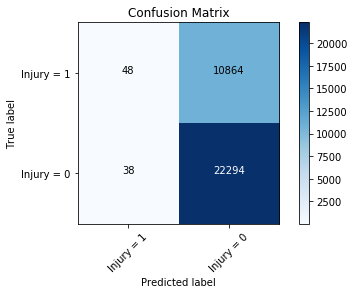

In [22]:
cnf_matrix = confusion_matrix(y_test,yhat,labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['Injury = 1', 'Injury = 0'],normalize = False, title='Confusion Matrix')

In [23]:
print (classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80     22332
           1       0.56      0.00      0.01     10912

    accuracy                           0.67     33244
   macro avg       0.62      0.50      0.41     33244
weighted avg       0.63      0.67      0.54     33244



In [24]:
from sklearn.metrics import log_loss
log_loss(y_test,yhat_prob)

0.6229306837478519